In [1]:
from warnings import simplefilter
simplefilter("ignore", category=FutureWarning) 
simplefilter("ignore", category=UserWarning)
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from apply_template import apply_n_template
from immunova.data.mongo_setup import pd_init
pd_init()

Applying boundary...
------ boundary ------
New population: cells
...proportion of total events: 0.879
...proportion of parent: 0.879
New population: debris
...proportion of total events: 0.121
...proportion of parent: 0.121
-----------------------
Applying CD45_gate...
------ CD45_gate ------
New population: CD45+
...proportion of total events: 0.645
...proportion of parent: 0.734
New population: CD45-
...proportion of total events: 0.234
...proportion of parent: 0.266
-----------------------
Applying live_gate...
------ live_gate ------
New population: dead
...proportion of total events: 0.033
...proportion of parent: 0.052
New population: Live_CD45+
...proportion of total events: 0.611
...proportion of parent: 0.948
-----------------------
Applying singlets_gate...
------ singlets_gate ------
New population: doublets
...proportion of total events: 0.061
...proportion of parent: 0.100
New population: Single_Live_CD45+
...proportion of total events: 0.550
...proportion of parent: 0.90

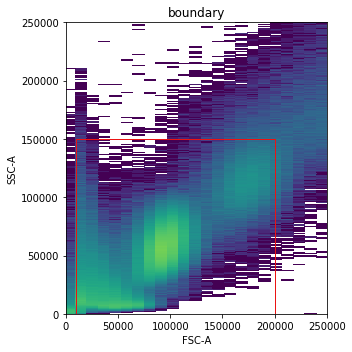

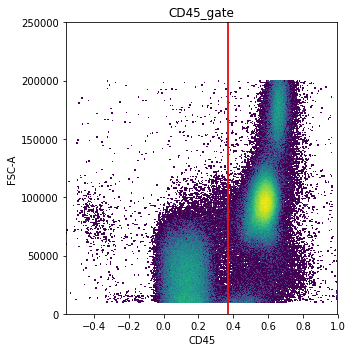

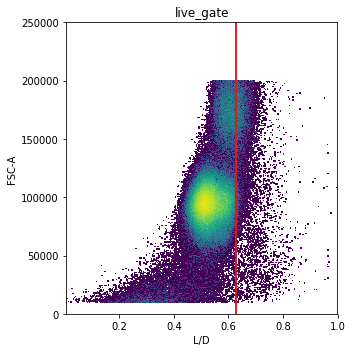

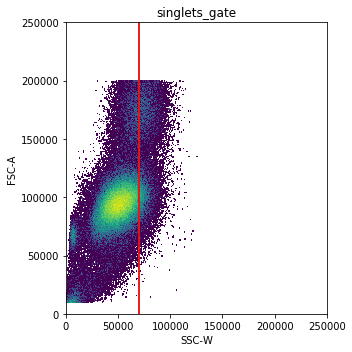

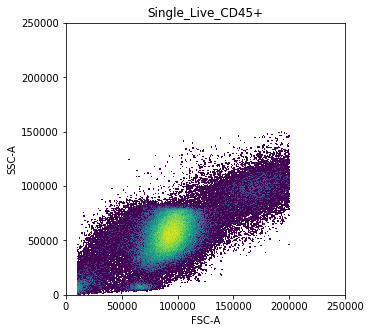

In [2]:
t = apply_n_template(sample_id='210-14_pdmc_n')

In [3]:
p, n = t.fetch_geom('doublets'), t.fetch_geom('Single_Live_CD45+')
k = 'threshold'
p[k], n[k] = 100000, 100000
t.edit_gate('singlets_gate', updated_geom={'doublets': p, 'Single_Live_CD45+': n})

Editing gate: singlets_gate
Updating doublets
Updating Single_Live_CD45+
The following gates are downstream of singlets_gate and will need to be applied again: []
Edit complete!


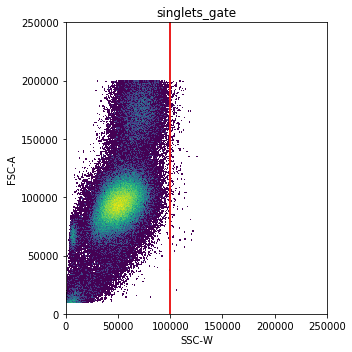

In [4]:
t.plotting.plot_gate('singlets_gate')

In [7]:
t.save(overwrite=True)

Saved successfully!


True